# Importing Packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

### Useful functions

In [2]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )



# Preparing data

## Reading from file

In [3]:
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
#df = pd.read_csv('autos.csv.gz', sep=',', header=0, compression='gzip',encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
33117,2016-03-19 21:36:21,Schoener_Golf_Variant,privat,Angebot,18700,control,NaN,2017,manuell,150,golf,30000,6,NaN,volkswagen,nein,2016-03-19 00:00:00,0,26802,2016-03-23 12:19:44
289080,2016-03-19 07:54:21,BMW_e36_316i,privat,Angebot,800,control,limousine,1993,manuell,101,NaN,150000,5,benzin,bmw,nein,2016-03-19 00:00:00,0,86836,2016-04-06 06:16:38
293451,2016-03-31 18:47:02,Audi_A6_2.5TDI___defekt,privat,Angebot,800,control,limousine,2001,manuell,149,a6,150000,4,diesel,audi,ja,2016-03-31 00:00:00,0,55595,2016-03-31 18:47:02
10397,2016-03-11 12:47:58,BMW_330d_DPF__XENON__HIFI__SPORTSITZE__M_FAHRWERK,privat,Angebot,13000,test,limousine,2011,manuell,245,3er,150000,4,diesel,bmw,nein,2016-03-11 00:00:00,0,50739,2016-04-07 06:45:02
37554,2016-03-29 22:47:57,Mercedes_Benz_E_320,privat,Angebot,1700,test,limousine,1995,automatik,220,e_klasse,150000,11,benzin,mercedes_benz,nein,2016-03-29 00:00:00,0,32758,2016-04-06 10:45:36
262635,2016-03-08 10:56:31,Mercedes_Benz_R_300_CDI_DPF_BlueEFFICIENCY_7G_...,privat,Angebot,32850,test,bus,2012,automatik,190,andere,60000,12,diesel,mercedes_benz,nein,2016-03-08 00:00:00,0,10707,2016-03-30 17:15:23
93140,2016-03-22 19:53:22,Volkswagen_Golf_Variant_1.9_TDI_Edition,privat,Angebot,1950,test,kombi,2000,manuell,90,golf,150000,8,diesel,volkswagen,nein,2016-03-22 00:00:00,0,30455,2016-03-24 04:46:46
23619,2016-03-19 18:54:12,Smart_smart_&_pure,privat,Angebot,1199,test,kleinwagen,1999,manuell,45,fortwo,150000,10,benzin,smart,nein,2016-03-19 00:00:00,0,94148,2016-04-07 06:16:37
182367,2016-03-08 04:00:04,VW_Passat_1_6_FSI_Baujahr_10/2006,privat,Angebot,5500,control,limousine,2006,manuell,116,passat,150000,10,benzin,volkswagen,nein,2016-03-08 00:00:00,0,46537,2016-03-09 06:16:58
172621,2016-03-07 21:52:37,Mein_geliebtes_Kadett_GSI_Cabrio,privat,Angebot,3000,control,cabrio,1991,manuell,150,kadett,150000,7,benzin,opel,nein,2016-03-07 00:00:00,0,12627,2016-04-06 03:45:51


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


# Dropping some useless columns


In [5]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


In [6]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)


## Cleaning data

Cleaning data from duplicates, NaNs and selecting reasonable ranges for columns


In [7]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few km: " , df.loc[df.kilometer < 5000].count()['name'])
print("Too many km: " , df.loc[df.kilometer > 200000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))


Too new: 14680
Too old: 289
Too cheap: 13320
Too expensive:  232
Too few km:  0
Too many km:  0
Too few PS:  41040
Too many PS:  835
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  [nan 'ja' 'nein']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


## Working on the `null` values

Checking if theree are NaNs to fix or drop

In [8]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

In [9]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

Checking if all the nulls have been filled or dropped.

In [10]:
dedups.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

OK, we're clear. Let's do some visualization now.

## Visualizations
### Categories distribution
Let's see some charts to understand how data is distributed across the categories

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


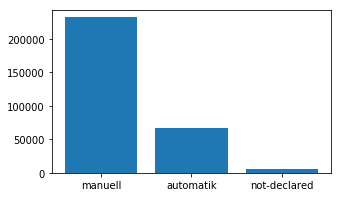

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


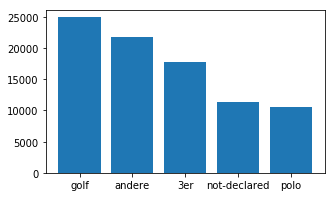

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


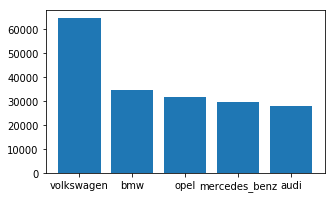

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


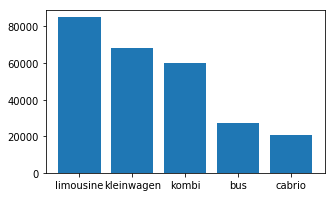

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


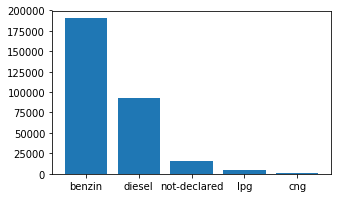

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


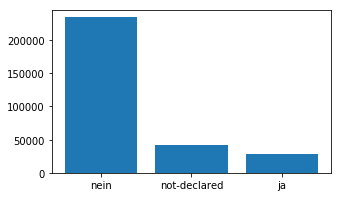

In [11]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

### Feature engineering

Adding the name length to see how much does a long description influence the price

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


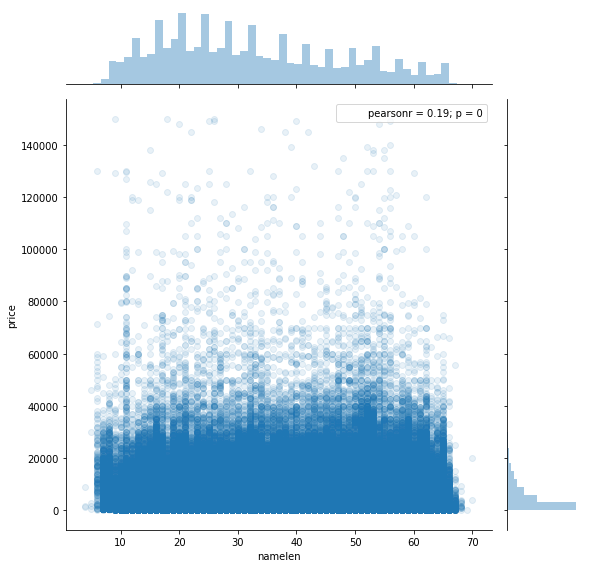

In [12]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
#                   data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    size=8)




In [13]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]


In [14]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])

0.6224184813880769

Labels for the name column account for 62% of the total. I think it's too much, so I remove the feature.

In [15]:
labeled.drop(['name_feat'], axis='columns', inplace=True)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Correlations

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385264,0.573037,-0.444440,0.044782,0.186254,-0.297746,-0.002440,-0.012514,-0.105694,0.055978,-0.010906
yearOfRegistration,0.385264,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958
powerPS,0.573037,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243
kilometer,-0.444440,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183
monthOfRegistration,0.044782,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369
namelen,0.186254,0.158798,0.106243,-0.105892,0.044338,1.000000,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672
gearbox_feat,-0.297746,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224
notRepairedDamage_feat,-0.002440,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220
model_feat,-0.012514,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196
brand_feat,-0.105694,-0.044526,-0.310254,-0.026645,-0.012156,0.100056,0.125735,0.016474,0.472098,1.000000,-0.023840,-0.102601


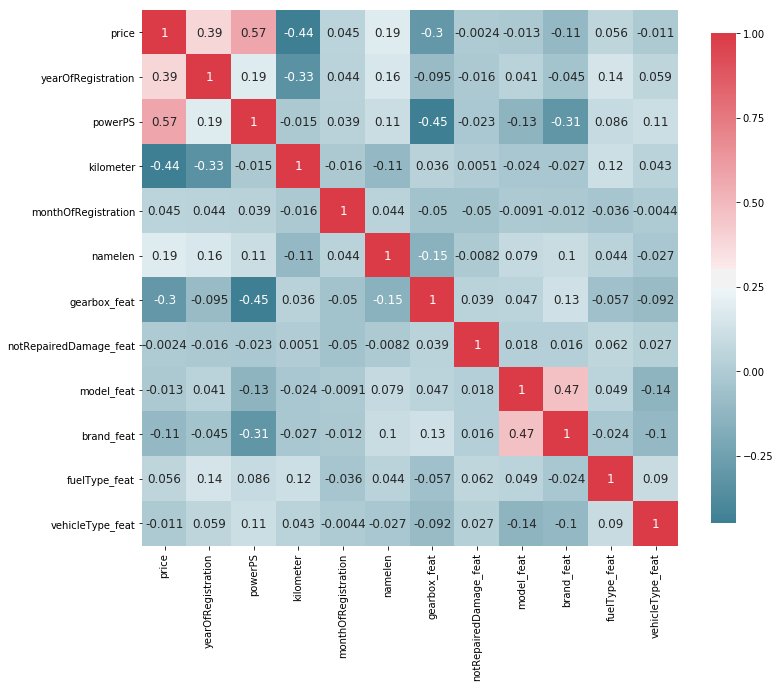

In [16]:
plot_correlation_map(labeled)
labeled.corr()

In [17]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64

# Playing with different models

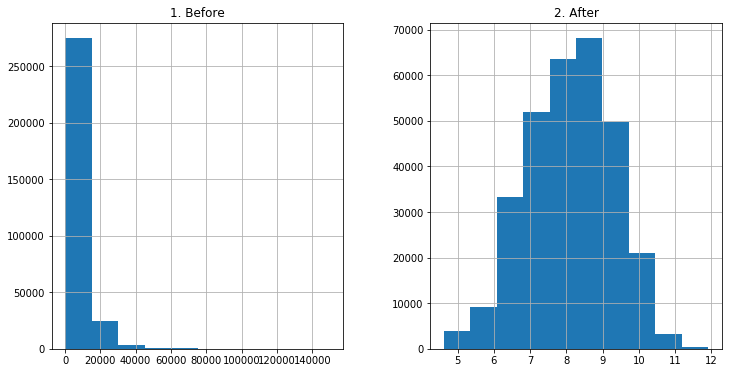

In [18]:

Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

### Basic imports and functions

In [46]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


# Percent of the X array to use as training set. This implies that the rest will be test set

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
print(X_train)
r = range(2003, 2017)
km_year = 10000



(212893, 11) (91240, 11) (212893,) (91240,)
        yearOfRegistration  powerPS  kilometer  monthOfRegistration  namelen  \
327415                1991       70     150000                    1       18   
79284                 2006      179     150000                    1       43   
270903                2003      144     150000                    5       60   
313239                2000       75     125000                    4       11   
320054                1992       90     150000                   10       26   
129260                2002       54     125000                   12       19   
246899                2004      174     150000                   12       55   
337573                2011      450      90000                    2       17   
71340                 1994      102     150000                    4        8   
283002                2006      200     100000                    3       45   
13417                 1998      177     150000                   11       35

In [48]:
print(y_train)

327415     6.381816
79284      8.476580
270903     7.467942
313239     6.621406
320054     6.042633
129260     7.804251
246899     9.433564
337573    10.568775
71340      7.208600
283002     9.208439
13417      8.294300
87427      8.497195
163967     8.839422
237011     6.685861
356897     9.890959
360995     5.993961
149174     7.783641
57772      9.433484
3448       9.093919
118197     9.159152
15338      6.908755
280175     9.296610
249333     9.047821
272003     7.496097
223534     8.867991
260141     9.798183
327891     8.128880
87369      9.047939
205943     5.707110
234200     8.343078
            ...    
176968     5.521461
87577      8.716208
344980    10.532096
215175     7.003974
92718      6.907755
38280      7.378384
91918      9.581973
124527     5.860786
117506     9.741027
195411     9.230241
325244    10.122663
87378      5.017280
79922      9.536113
83760      7.596392
293181     9.345832
221434     9.259131
120420     6.907755
234128     6.908755
4380       9.735128


In [49]:
print(X_val)

        yearOfRegistration  powerPS  kilometer  monthOfRegistration  namelen  \
64816                 2000      170     150000                    0       61   
113605                1970       88      50000                    6       13   
162017                2008      170     150000                   10       27   
277070                2002      170     150000                   12       11   
116433                2003       75     150000                   11       48   
70209                 2002       82       5000                   10       12   
173438                1999      147     150000                   10       55   
360924                1989       77     150000                    5       19   
342698                2007      235     150000                   10       11   
189637                1996       90     150000                    3       41   
114404                2001      197     150000                    2       32   
368991                2005      177     

In [50]:
print(y_val)

64816      7.863651
113605    10.064798
162017     9.018090
277070     8.612503
116433     7.740664
70209      7.313887
173438     6.154858
360924     8.216358
342698     9.615805
189637     7.313887
114404     8.699681
368991     8.612685
330428     7.170888
77492      7.131699
55794      8.188967
292666    10.041117
121267     6.042633
148308     6.857514
306744     6.907755
147714     7.863651
84533      9.432764
21834      7.409136
237533     9.071193
285101     8.921458
138174     7.527256
253417     8.981053
254514     8.497195
364716     8.936035
261488     5.993961
91243      8.117014
            ...    
52043      7.313887
251608     8.521384
70913      7.844241
185170     8.665786
118823     9.104980
31377      7.090910
180659    10.085434
47841      8.612503
310768     6.684612
292080     9.943477
282837     8.366603
234171     7.280008
189434     9.539716
58040      7.378384
41207      9.190240
306399    10.021315
331124     8.411833
92316     11.429555
230967     7.638198


# Multi-Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [21]:
mr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_predict2=mr.predict(X_val)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predict2)

0.5866304613041808

# Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [25]:
y_predict=regressor.predict(X_val)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predict)

0.7550039367929925

# Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.0min finished


In [43]:
print(gs.best_score_)
print(gs.best_params_)
 

0.8275093502108699
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [44]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))


Score: 0.83


In [45]:
y_predict1=gs.predict(X_val)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predict1)

0.8278058166337326